# Libs

In [13]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from matplotlib.ticker import ScalarFormatter

import os
import glob
import lasio
import dlisio as dlis

pd.options.display.max_columns = 10
pd.options.display.precision = 5
pd.options.display.max_colwidth = 30
pd.options.display.max_rows = 6

# Data visualization

In [14]:
cpi_wells = pd.read_parquet('Project\input\cpi_data.parquet')
well_logs = pd.read_parquet('Project\input\interp_logs_input.parquet')
pp_eval = pd.read_parquet('Project\input\interp_logs_output.parquet')
logs_pp = well_logs.set_index(['well', 'depth']).join(pp_eval.set_index(['well', 'depth']), rsuffix='_pp').reset_index()

In [4]:
# https://medium.com/@sarmadafzalj/python-plot-composite-oil-and-gas-petrophysical-logs-using-matplotlib-4ee28fc61ff8
# plt plot for well logs above

In [5]:
# DEPTH.M                    :  
# BS   .IN                   :  8.5
# BVW  .V/V                  :  PHIF*SW
# CARB_FLAG.UNITLESS                 :  Values changed using TEXT_EDIT
# COAL_FLAG.UNITLESS                 :  Coal flag
# DELTA.V/V                  :  (NPHI-PORD)
# GRMAX.GAPI                 :  Gamma Ray Shale Value
# GRMIN.GAPI                 :  Gamma Ray Clean Value
# J    .                     :  (0.034355/8.27)*REFERENCE.H_FWL*(KLOGH/PHIF)**0.5
# KLHC_INT.MD                   :  Values changed using TEXT_EDIT
# KLOGH.MD                   :  Values changed using TEXT_EDIT
# M    .UNITLESS                 :  1.865*KLOGH**-0.0083
# N    .                     :  Saturation exponent
# PERF_FLAG.UNITLESS                 :  1
# PHIF .V/V                  :  Values changed using TEXT_EDIT
# PORD .V/V                  :  Density porosity
# RHOFL.G/CM3                 :  Fluid density
# RHOMA.G/CM3                 :  Fixed RHOMA
# RW   .OHMM                 :  Formation Resistivity
# SAND_FLAG.UNITLESS                 :  Values changed using TEXT_EDIT
# SW   .V/V                  :  Water Saturation
# SWIRR.                     :  0.42*KLOGH**-0.18
# TEMP .DEGC                 :  Calculated temperature curve
# VSH  .V/V                  :  Merged HQLD.HQLDVSH_1 and OFFICIAL.VSH_1 at 3673.32

<StringArray>
['15_9-19 A', '15_9-19 B&BT2', '15_9-19 S&SR']
Length: 3, dtype: string

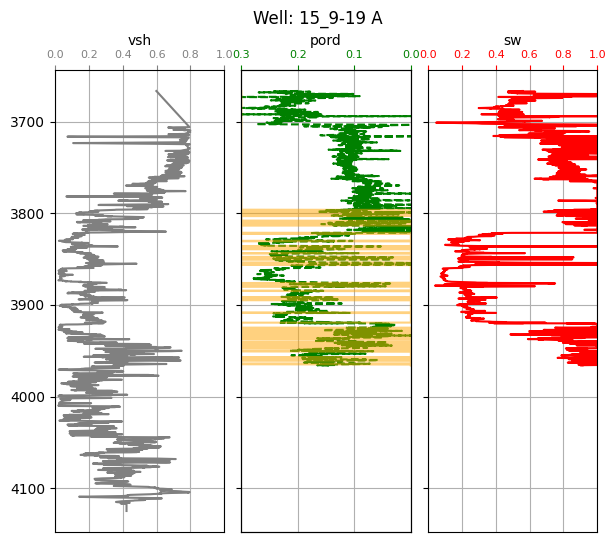

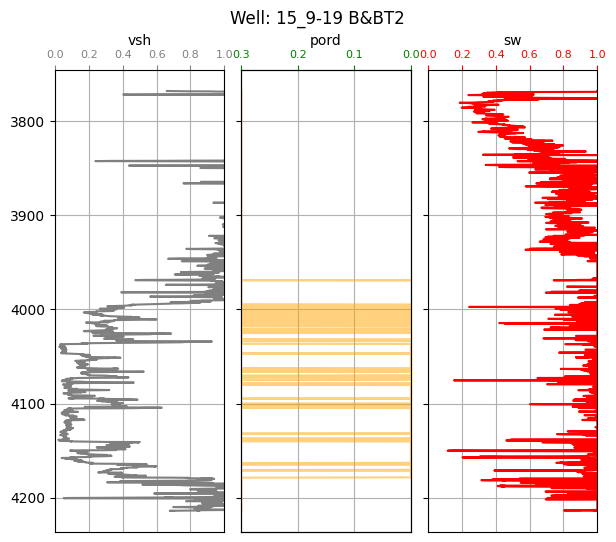

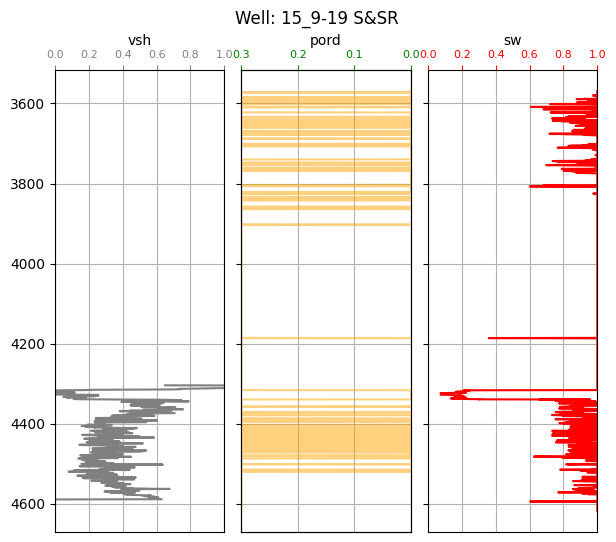

In [6]:
def diagram_cpi(df, wellname):
    fig, axes = plt.subplots(1, 3, figsize=(7, 6), sharey=True)
    axes[0].plot(df['vsh'], df['depth'], color='gray')
    axes[0].set_xlabel('vsh')
    axes[0].set_xlim(0,1)
    axes[0].xaxis.set_major_locator(plt.MaxNLocator(5))
    axes[0].tick_params(axis='x', colors='gray', labelsize=8)


    axes[1].plot(df['pord'], df['depth'], color='green', ls='--')
    axes[1].set_xlabel('pord')
    axes[1].set_xlim(0.3,0)
    axes[1].xaxis.set_major_locator(plt.MaxNLocator(3))
    axes[1].tick_params(axis='x', colors='green', labelsize=8)

    net = axes[1].twiny()
    net.plot(df['sand_flag'], df['depth'], color='orange', alpha=0.5)
    net.set_xlim(0,1)
    net.set_xticklabels([])  # Remove x-axis tick labels
    net.set_xticks([])       # Remove x-axis ticks

    axes[2].plot(df['sw'], df['depth'], color='red')
    axes[2].set_xlabel('sw')
    axes[2].set_xlim(0,1)
    axes[2].xaxis.set_major_locator(plt.MaxNLocator(5))
    axes[2].tick_params(axis='x', colors='red', labelsize=8)

    for i, ax in enumerate(axes):
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.grid(True)
    fig.suptitle(f'Well: {wellname}', y=0.98, fontsize=12)
    fig.subplots_adjust(wspace=0.1, hspace=0.0)
    plt.show()
display(cpi_wells.well.unique())
for wellname in cpi_wells.well.unique():
    df = cpi_wells[cpi_wells.well == wellname]
    diagram_cpi(df, wellname)

In [9]:
# DEPTH   .M            00 001 00 00:   0  Depth
# BVW     .V/V          00 000 00 00:   1  Bound Volume Water
# COAL_FLAG.unitless    00 000 00 00:   2  Coal Flag
# KLOGH   .MD           00 000 00 00:   3  Calculated Horizontal PERMEABILITY from logs
# PHIF    .V/V          00 000 00 00:   4  Final porosity
# SAND_FLAG.unitless    00 000 00 00:   5  Sand Flag
# SW      .V/V          00 000 00 00:   6  Water Saturation (Archie)
# VCARB   .V/V          00 000 00 00:   7  Volume of calcite; dolomite and siderite from log analysis; repo
# VSH     .V/V          00 000 00 00:   8  (GR-15)/(250-15)

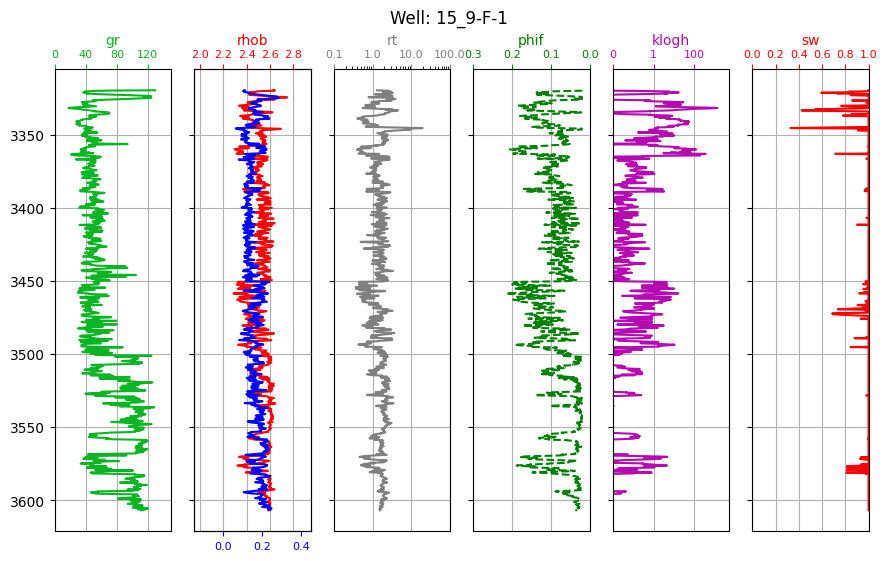

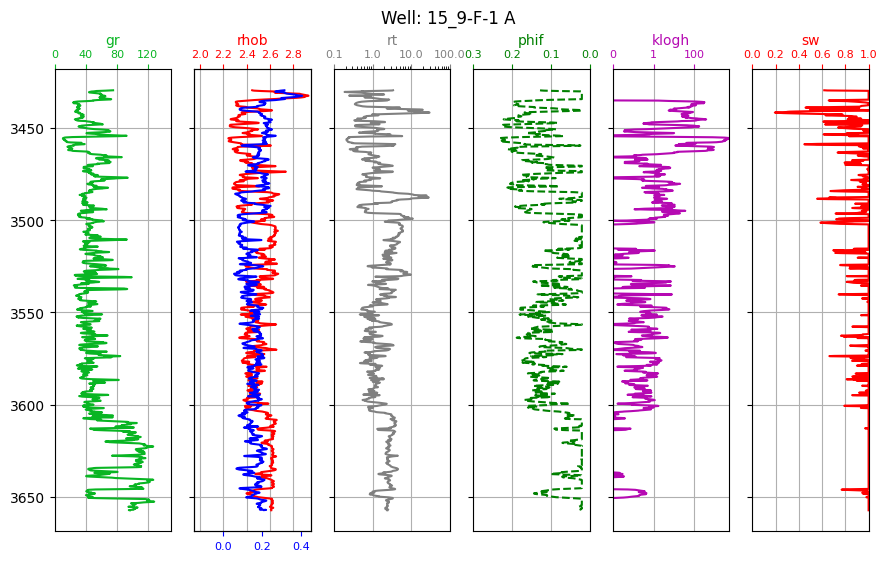

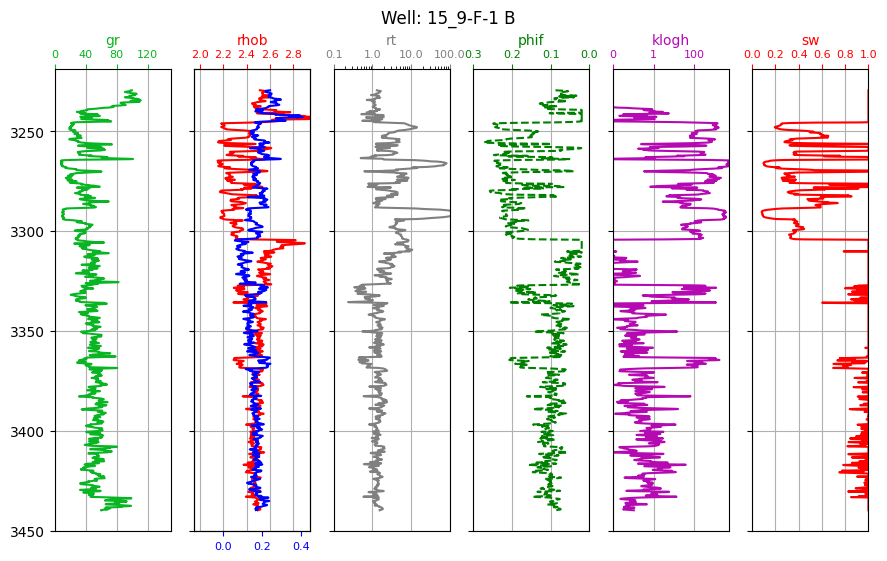

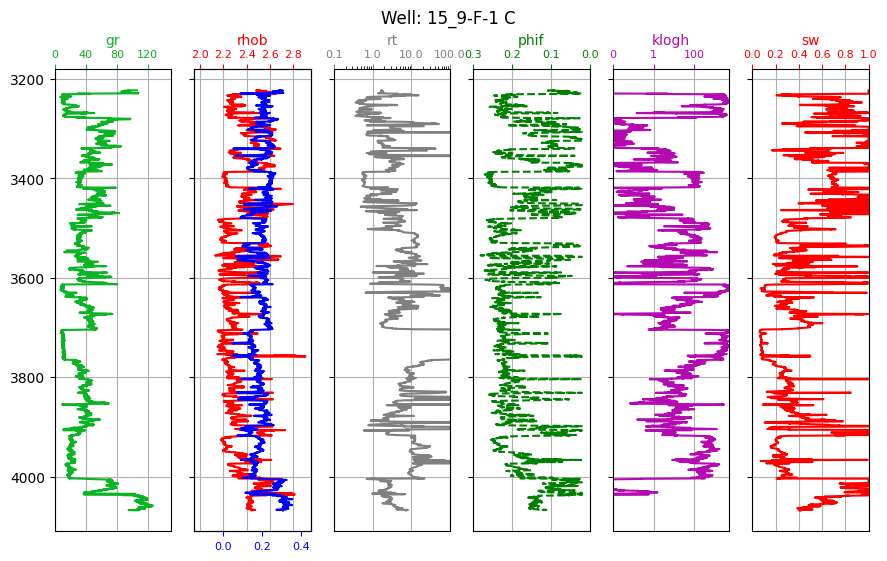

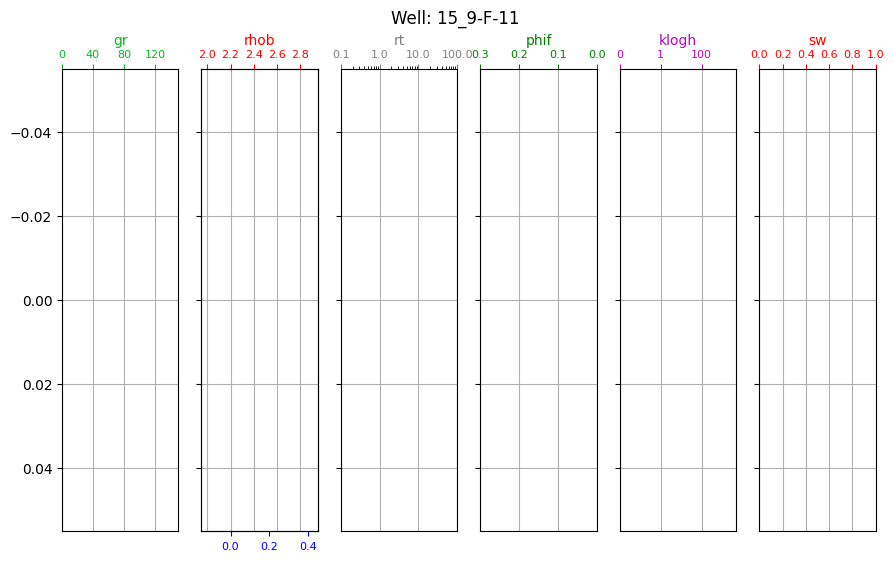

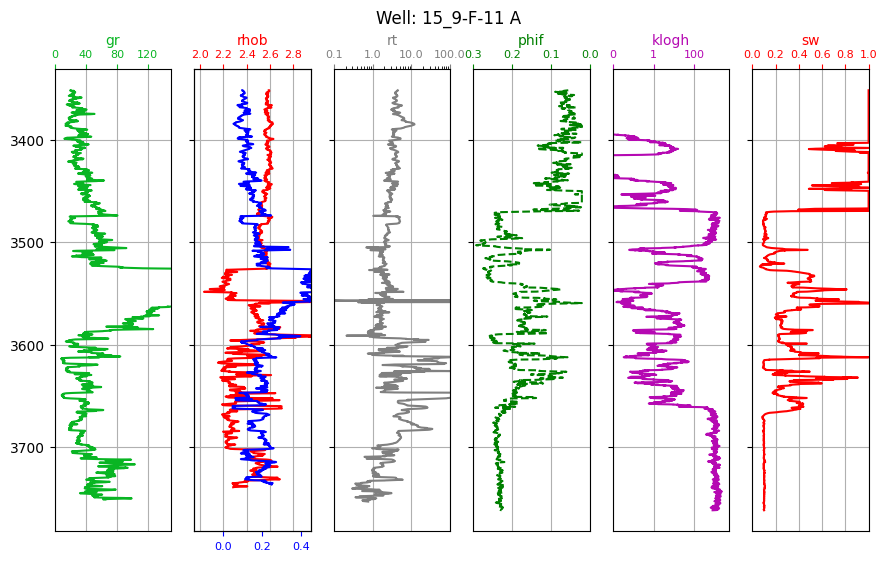

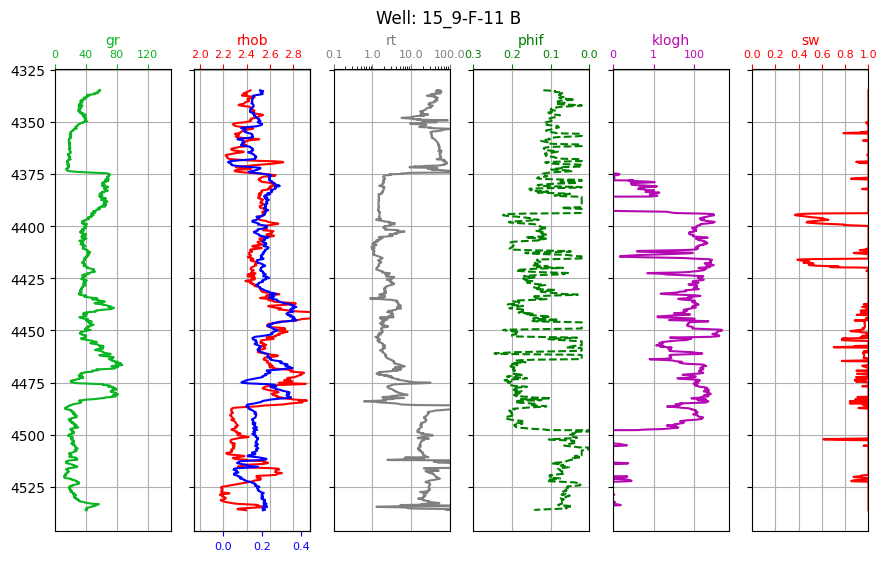

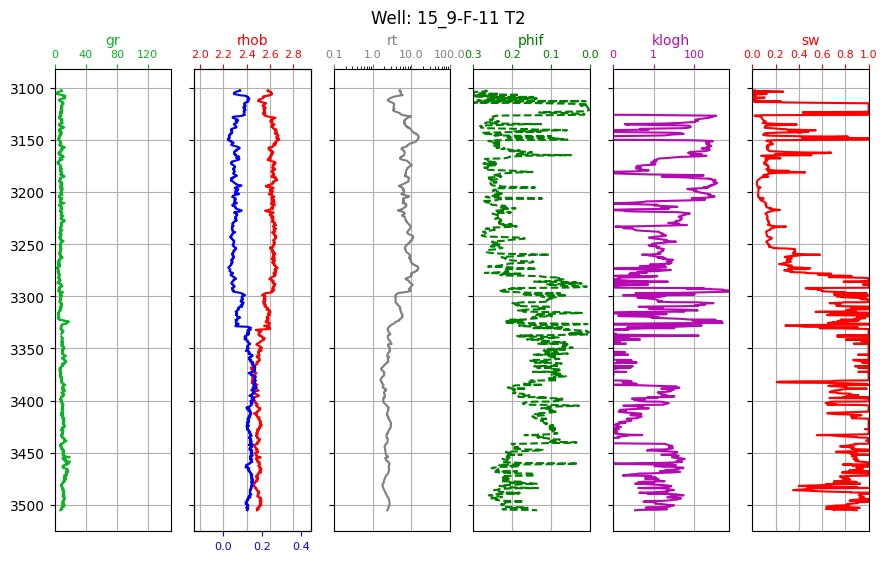

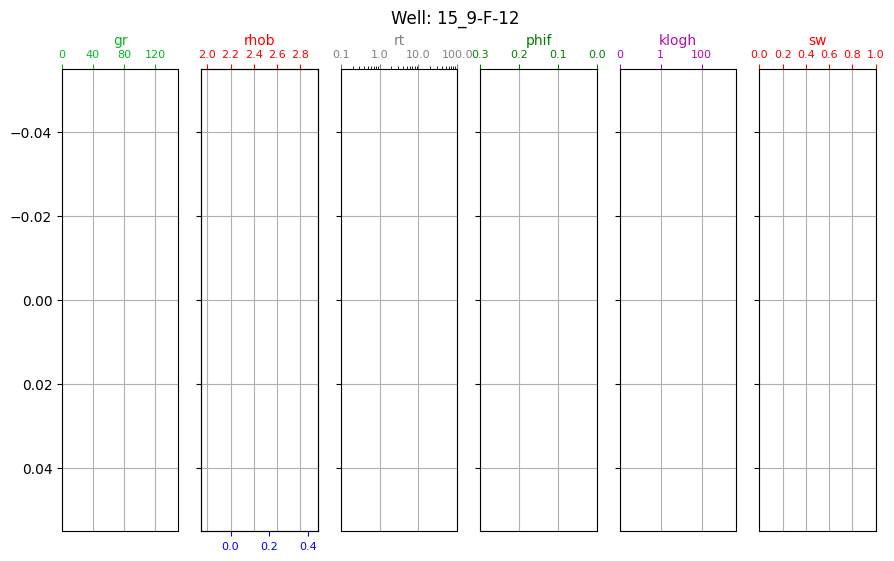

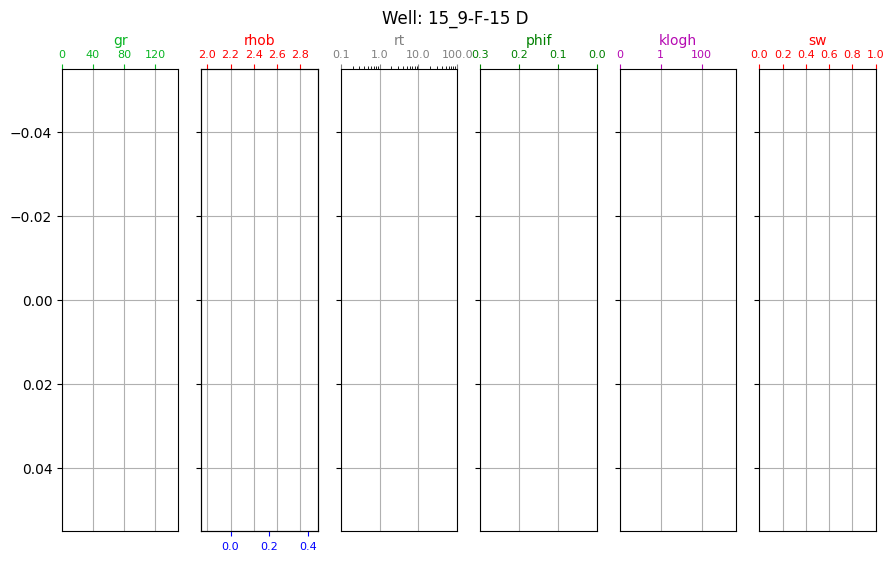

In [26]:
def diagram_logs_pp(df, wellname):
    n = 6
    fig, axes = plt.subplots(1, n, figsize=(n*1.75, 6), sharey=True)
    gr = axes[0]
    gr.plot(df['gr'], df['depth'], color='#09b523')
    gr.set_xlabel('gr', color='#09b523')
    gr.set_xlim(0,150)
    gr.xaxis.set_major_locator(plt.MaxNLocator(4))
    gr.tick_params(axis='x', colors='#09b523', labelsize=8)
    gr.invert_yaxis()

    rhob = axes[1]
    rhob.plot(df['rhob'], df['depth'], color='red')
    rhob.set_xlabel('rhob', color='red')
    rhob.set_xlim(1.95,2.95)
    rhob.xaxis.set_major_locator(plt.MaxNLocator(6))
    rhob.tick_params(axis='x', colors='red', labelsize=8, bottom=False, top=True)
    # rhob.spines['top'].set_edgecolor('red')
    # rhob.spines['top'].set_position(('outward', 0))
    
    nphi = axes[1].twiny()
    nphi.plot(df['nphi'], df['depth'], color='blue')
    nphi.set_xlim(-0.15, 0.45)
    nphi.xaxis.set_major_locator(plt.MaxNLocator(3))
    nphi.tick_params(axis='x', colors='blue', labelsize=8, bottom=True, top=False, labelbottom=True, labeltop=False)
    # nphi.set_label_position('bottom')
   
    rt = axes[2]
    rt.plot(df['rt'], df['depth'], color='gray')
    rt.set_xlabel('rt', color='gray')
    rt.set_xscale('log')
    rt.set_xlim(0.1,100)
    rt.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    rt.tick_params(axis='x', colors='gray', labelsize=8, bottom=False, top=True)

    phif = axes[3]
    phif.plot(df['phif'], df['depth'], color='green', ls='--')
    phif.set_xlabel('phif', color='green')
    phif.set_xlim(0.3,0)
    phif.xaxis.set_major_locator(plt.MaxNLocator(3))
    phif.tick_params(axis='x', colors='green', labelsize=8, bottom=False, top=True)
        
    klogh = axes[4]
    klogh.plot(df['klogh'], df['depth'], color='#b509b2')
    klogh.set_xlabel('klogh', color='#b509b2')
    klogh.set_xscale('log')
    klogh.set_xlim(0.01,5000)
    klogh.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    klogh.tick_params(axis='x', colors='#b509b2', labelsize=8, bottom=False, top=True)

    sw = axes[5]
    sw.plot(df['sw'], df['depth'], color='red')
    sw.set_xlabel('sw', color='red')
    sw.set_xlim(0,1)
    sw.xaxis.set_major_locator(plt.MaxNLocator(5))
    sw.tick_params(axis='x', colors='red', labelsize=8, bottom=False, top=True)

    for i, ax in enumerate(axes):
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.grid(True)

    fig.suptitle(f'Well: {wellname}', y=0.98, fontsize=12)
    # fig.subplots_adjust(wspace=0.15, hspace=0.0)

    # axes[1].set_xticklabels([])  # Remove x-axis tick labels
    # axes[1].set_xticks([])       # Remove x-axis ticks
    plt.show()

for wellname in logs_pp.well.unique():
    df = logs_pp[logs_pp.well == wellname]
    df = df[df.phif.notnull()]
    diagram_logs_pp(df, wellname)

# Pdf reading

In [11]:
# import PyPDF2

# def read_pdf(file_path, page_num):
#     # Open the PDF file
#     with open(file_path, 'rb') as file:
#         # Create a PDF reader object
#         pdf_reader = PyPDF2.PdfReader(file)
        
#         # Get the number of pages in the PDF
#         num_pages = pdf_reader.numPages
        
#         # Initialize a variable to store the extracted text
#         text = ""
        
#         # Loop through each page and extract text
#         for page_num in range(len(pdf_reader.pages)):
#             page = pdf_reader.pages[page_num]
#             text += page.extract_text()
#         return text

# # Example usage
# file_path = r'C:\jupyter\proj_volve_geodata_analytics\Well_logs_pr_WELL\15_9-19 A\05.PETROPHYSICAL INTERPRETATION\2005_Sleipner _Øst_Hugin_Petrophysical_evaluation.pdf'
# pdf_text = read_pdf(file_path, 37)
# print(pdf_text)

# Tops assigning manually

In [39]:
cpi_wells.well.unique()

<StringArray>
['15_9-19 A', '15_9-19 B&BT2', '15_9-19 S&SR']
Length: 3, dtype: string

In [67]:
tops = pd.read_csv(r'C:\jupyter\proj_volve_geodata_analytics\Well_logs_pr_WELL\15_9-19 A\05.PETROPHYSICAL INTERPRETATION\tops.csv',
                   sep=' ').reset_index().iloc[:, :4]
tops.columns = ['Formation', 'Formation_num', 'Top', 'Base']
tops.Formation = tops.Formation.astype('string')
tops.Formation_num = tops.Formation_num.astype('string')
tops['fm'] = tops.Formation + '_' + tops.Formation_num
tops['well'] = '15_9-19 A'
tops = tops.drop(columns=['Formation', 'Formation_num'])[['well','fm', 'Top', 'Base']]
tops.columns = tops.columns.str.lower()
tops

,well,fm,top,base
0,15_9-19 A,Heather_0,3767.0,3821.5
1,15_9-19 A,Hugin_17,3821.5,3825.0
2,15_9-19 A,Hugin_16,3825.0,3830.1
...,...,...,...,...
15,15_9-19 A,Hugin_3,3891.6,3898.4
16,15_9-19 A,Hugin_2,3898.4,3908.2
17,15_9-19 A,Hugin_1,3908.2,3919.6


In [61]:
tops = pd.read_csv(r'C:\jupyter\proj_volve_geodata_analytics\Well_logs_pr_WELL\15_9-19 B&BT2\05.PETROPHYSICAL INTERPRETATION\tops.csv',
                   sep=' ').reset_index().iloc[:, :4]
tops.columns = ['Formation', 'Formation_num', 'Top', 'Base']
tops.Formation = tops.Formation.astype('string')
tops.Formation_num = tops.Formation_num.astype('string')
tops['fm'] = tops.Formation + '_' + tops.Formation_num
tops['well'] = '15_9-19 B&BT2'
tops = tops.drop(columns=['Formation', 'Formation_num'])[['well','fm', 'Top', 'Base']]
tops.columns = tops.columns.str.lower()
tops

,well,fm,top,base
0,15_9-19 B&BT2,Heather_0,3946.0,4035.8
1,15_9-19 B&BT2,Hugin_18,4035.8,4046.4
2,15_9-19 B&BT2,Hugin_17,4046.4,4051.2
...,...,...,...,...
17,15_9-19 B&BT2,Hugin_2,4155.7,4166.3
18,15_9-19 B&BT2,Hugin_1,4166.3,4178.6
19,15_9-19 B&BT2,Hugin_0,4035.8,4178.6


In [69]:
tops = pd.read_csv(r'C:\jupyter\proj_volve_geodata_analytics\Well_logs_pr_WELL\15_9-19 S&SR\05.PETROPHYSICAL INTERPRETATION\tops.csv',
                   sep=' ').reset_index().iloc[:, :4]
tops.columns = ['Formation', 'Formation_num', 'Top', 'Base']
tops.Formation = tops.Formation.astype('string')
tops.Formation_num = tops.Formation_num.astype('string')
tops['fm'] = tops.Formation + '_' + tops.Formation_num
tops['well'] = '15_9-19 S&SR'
tops = tops.drop(columns=['Formation', 'Formation_num'])[['well','fm', 'Top', 'Base']]
tops.columns = tops.columns.str.lower()
tops

,well,fm,top,base
0,15_9-19 S&SR,Hugin_6,4304.1,4309.2
1,15_9-19 S&SR,Hugin_5,4309.2,4316.3
2,15_9-19 S&SR,Hugin_4,4316.3,4321.0
...,...,...,...,...
4,15_9-19 S&SR,Hugin_2,4322.5,4328.1
5,15_9-19 S&SR,Hugin_1,4328.1,4339.9
6,15_9-19 S&SR,Hugin_0,4316.3,4339.9
